# Partie 3 : Approximation de données par les moindres carrés
### But : effectuer des approximations polynômiales et quelconques d'un nuage de points

In [59]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np

import scipy as sci
import sympy as sym
from scipy.optimize import least_squares
from sympy import *
import math
import random

## 1. Générer un nuage de points

In [61]:
#Fonction qui crée un nuage de point
def nuage_point(nb_pts, a, b, c, ):
    incertitude = input("Entrer incertitude\n")
    precision = incertitude[::-1].find('.')
    if (precision == - 1):
        precision = 0
    incertitude = float(incertitude)

    l_xi = random.sample(range(a,b), nb_pts)
    l_xi.sort()

    l_yi = []
    yo = round(random.uniform(c,d),precision)
    l_yi.append(yo)

    for i in range(1, nb_pts, 1):
        prev_y = l_yi[i - 1]
        
        yi = round(random.uniform(c,d), precision)
        if (abs(yi - prev_y) > incertitude):
            while(abs(yi - prev_y) > incertitude):
                yi = round(random.uniform(c,d), precision)
        l_yi.append(yi)
    return l_xi, l_yi

In [65]:
#Fonction qui trace les points
def tracerPoint(cooX, cooY):
  plt.scatter(cooX, cooY, color="black", marker="x")
  plt.axhline(0, color = "black")
  plt.axvline(0, color = "black")
  plt.grid()
  plt.show()

Entrer incertitude
2
X [0, 2, 3, 7, 9]
Y [8.0, 10.0, 10.0, 11.0, 12.0]


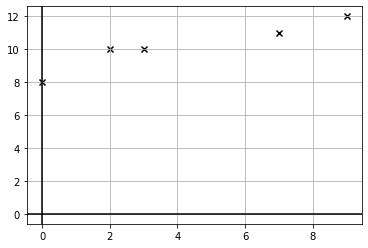

In [106]:
X, Y = nuage_point(5, 0, 10, 2, 40)
print("X", X)
print("Y", Y)
tracerPoint(X, Y)

## Fonction pour avoir le degré du polynôme
Le degré du polynôme correspond au nombre de variation

In [ ]:
def nbVariation(cooX, cooY):

  def coeffDirecteur(x0, x1, y0, y1):
    a = (y1 - y0)/(x1 - x0)
    if a > 0:
      return 1
    elif a < 0:
      return -1
    else:
      return 0

  variation = 1
  coeff = [coeffDirecteur(cooX[i], cooX[i + 1], cooY[i], cooY[i + 1]) for i in range(len(cooX) - 1)]

  for i in range(len(coeff) - 1):
    if (coeff[i] != coeff[i + 1]):
      variation += 1
  return variation

## Polynome d'approximation par la méthode des moindres carrés


In [88]:
def moindreCarre(X, Y):
    variation = nbVariation(X, Y)
    mymodel = np.poly1d(np.polyfit(X, Y, variation))
    myline = np.arange(min(X), max(X), 0.1)
    print("model = ", mymodel)
    plt.scatter(X, Y)

    #Tracer le polynôme 
    plt.plot(myline, mymodel(myline))

    plt.show()
    return mymodel

## Application aux exercices 7 et 8


model =   
2.154 x - 1.815


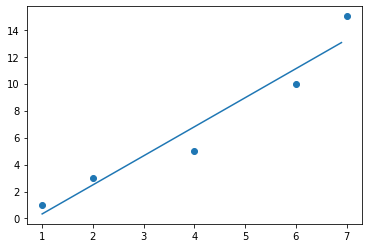

In [89]:
#Exercice 7
X1 = [1, 2, 4, 6, 7]
Y1 = [1, 3, 5, 10, 15]
moindreCarre(X1, Y1)

model =          2
0.8097 x - 4.026 x + 7.037


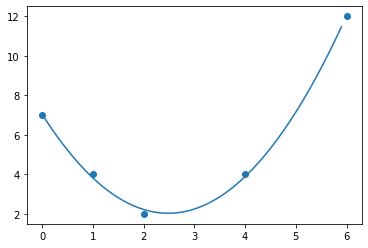

In [90]:
#Exercice 8
X2 = [0, 1, 2, 4, 6]
Y2 = [7, 4, 2, 4, 12]
moindreCarre(X2, Y2)

## Application sur un exemple


model =            3          2
-0.02199 x + 0.5878 x - 3.621 x + 3.775


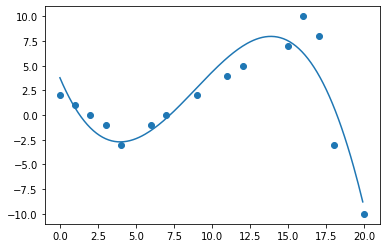

None


In [98]:
X3 = [0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 15, 16, 17, 18, 20]
Y3 = [2, 1, 0, -1, -3, -1, 0, 2, 4, 5, 7, 10, 8, -3, -10]
modele = moindreCarre(X3, Y3)

In [103]:
def getValeur(X, Y, nb):
  variation = nbVariation(X, Y)
  mymodel = np.poly1d(np.polyfit(X, Y, variation))
  print(mymodel(nb))

In [104]:
getValeur(X3, Y3, 22)
getValeur(X3, Y3, 25)
getValeur(X3, Y3, 50)

-25.511937470473768
-62.92394011943426
-1456.132964450982
